In [3]:
from os.path import expanduser
source_path = expanduser('~/Experiments/infrastructure-planning/tanzania-mv-lines.zip')

In [4]:
from geometryIO import load

In [45]:
s = load(source_path)

In [6]:
x[0]

'+proj=longlat +datum=WGS84 +no_defs '

In [10]:
x[1][-3:]

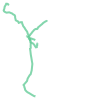

In [8]:
y = x[1][-1]
y

In [12]:
b = y

In [13]:
a = x[1][0]

In [24]:
len(b.geoms)

20

In [25]:
a.geoms

AttributeError: 'LineString' object has no attribute 'geoms'

In [29]:
print b.geoms[0].coords

In [30]:
from infrastructure_planning.parsers import flip_xy

In [46]:
geometry = b.geoms[0]
[flip_xy(x) for x in geometry.coords];

In [37]:
geometries = s[1]
len(geometries)

78

In [ ]:
from copy import copy

def flip_geometry_coordinates(geometries):
    flipped_geometries = []
    for geometry in geometries:
        if hasattr(geometry, 'geoms'):
            flip_geometry_coordinates(geometry.geoms)
        else:
            flipped_geometry = copy(geometry)
            flipped_geometry.coords = [flip_xy(xyz) for xyz in geometry.coords]
            flipped_geometries.append(flipped_geometry)
    return flipped_geometries

In [55]:
def flip_geometry_coordinates_old(geometries):
    for geometry in geometries:
        if hasattr(geometry, 'geoms'):
            flip_geometry_coordinates(geometry.geoms)
        else:
            geometry.coords = [flip_xy(xyz) for xyz in geometry.coords]
    return geometries

In [42]:
import copy
a = copy.copy(geometry)
print a.coords[0]

(34.73521198434022, -4.793846426595992)


In [47]:
flip_xy(geometry.coords);

In [48]:
flip_geometry_coordinates(s[1]);

In [57]:
s[1][0].coords[0]

(-4.669532022, 34.676219914)

In [56]:
flip_geometry_coordinates_old(s[1])[0].coords[0]

(-4.669532022, 34.676219914)